In [1]:
import os
from pathlib import Path
from random import sample 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import rasterio
from rasterio.plot import show
from rasterio.features import geometry_mask

In [2]:
data_path = "/n/holyscratch01/tambe_lab/kayan/karena/"
mine_info_path = "/n/home07/kayan/asm/data/mine_ids.txt"

In [3]:
# ids of all images
ids = [Path(x).stem for x in os.listdir(data_path+"images")]
# ids of just images containing mines
with open(mine_info_path, 'r') as f:
    mine_ids = f.read().split("\n") 

In [4]:
def load_img(img_id):
    img_path = data_path+"images/"+img_id+".tif"
    img = rasterio.open(img_path)
    img = img.read([3,2,1]) #RGB channels
    
    # normalize per channel
    img_norm = (img.T - np.min(img,axis=(1,2))) / (np.max(img,axis=(1,2)) - np.min(img,axis=(1,2))) # we take the transpose to allow for broadcasting
    img_norm = img_norm.T # undo transpose
    return img_norm

def load_raster(raster_id):
    raster_path = data_path+"rasters/"+raster_id+".tif"
    raster = rasterio.open(raster_path)
    raster = raster.read([1])
    return raster

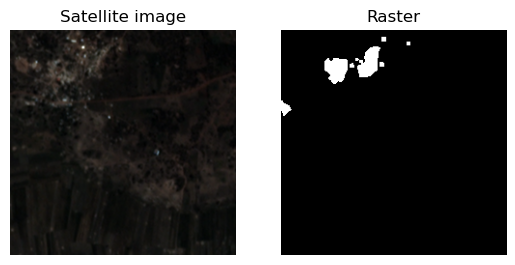

In [5]:
def plot_single(i):
    img = load_img(i)
    raster = load_raster(i)

    plt.subplot(121)
    plt.imshow(np.moveaxis(img,0,-1))
    plt.title("Satellite image")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(np.moveaxis(raster,0,-1),cmap="gray")
    plt.title("Raster")
    plt.axis("off");

i = sample(mine_ids,1)[0]
plot_single(i)

In [7]:
import rasterio
from rasterio.features import geometry_mask

def rasterize(geo,out_shape,transform):
    """Given a geometry, converts to a boolean raster with the geometry marked as True"""
    # if no polygons, return an all-False array
    if geo.isnull().item():
        return np.full(out_shape, False)
        
    # convert polygons to boolean rasters, with mines as True
    else:
        return geometry_mask(
            geo,
            transform=transform,
            invert=True, # so that polygons are marked as True
            out_shape=out_shape,
            all_touched=True
        )

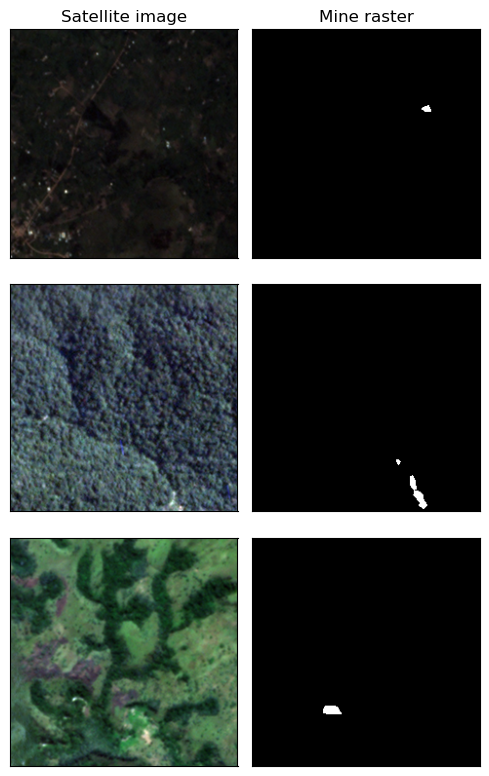

In [12]:
n = 3
ids = sample(mine_ids,n) # random subset of n images with mines
fig,axs = plt.subplots(nrows=n,ncols=2,figsize=(5,8))
for i in range(n):
    ax = axs[i]
    img = load_img(ids[i])
    raster = load_raster(ids[i])
    ax[0].imshow(np.moveaxis(img,0,-1))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    if i==0: ax[0].set_title("Satellite image")
    ax[1].imshow(np.moveaxis(raster,0,-1),cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    if i==0: ax[1].set_title("Mine raster")
fig.tight_layout()

In [ ]:
n = 4
ids = sample(mine_ids,n) # random subset of n images with mines
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(4,4))
for i in range(n):
    ax = axs[int(i/2)][i%2]
    img = load_img(ids[i])
    raster = load_raster(ids[i])
    ax.imshow(np.moveaxis(img,0,-1))
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.savefig("/n/home07/kayan/asm/images/sat_images.png")

## Check which image ids are missing in directory

In [3]:
import geopandas as gpd

path = "/n/home07/kayan/asm/data/filtered_labels.geojson"
label_df = gpd.read_file(path)

In [13]:
dir_ids = [Path(file_name).stem for file_name in os.listdir("/n/holyscratch01/tambe_lab/kayan/karena/images/")]

In [15]:
for df_id in label_df["unique_id"]:
    if df_id not in dir_ids: print(df_id)

lat_-1--065__lon_33--045
lat_-1--065__lon_33--055


In [22]:
label_df[label_df["unique_id"].isin(dir_ids)]

,lon,lat,unique_id,country,input_id,sample_type,mine_type,confidence,label,area_km2,proportion_inspected,proportion_mining,geometry
0,-12.885,9.155,lat_9--155__lon_-12--885,SLE,SLE-1279CL,IPIS,artisanal,3.0,1.0,0.000656,0.523869,0.000523,"POLYGON ((-12.88452 9.15891, -12.88457 9.15875..."
1,-12.875,9.175,lat_9--175__lon_-12--875,SLE,SLE-184CL,IPIS,artisanal,4.0,1.0,0.000587,0.350198,0.000468,"MULTIPOLYGON (((-12.87024 9.17627, -12.87035 9..."
2,-12.865,9.175,lat_9--175__lon_-12--865,SLE,SLE-184CL,IPIS,artisanal,4.0,1.0,0.003670,0.384139,0.002924,"POLYGON ((-12.86941 9.17610, -12.86930 9.17596..."
3,-12.855,9.125,lat_9--125__lon_-12--855,SLE,negatives-1428,CLU,artisanal,3.0,1.0,0.001271,0.784137,0.001013,"POLYGON ((-12.85544 9.12746, -12.85553 9.12733..."
4,-12.835,8.925,lat_8--925__lon_-12--835,SLE,negatives-638,CLU,artisanal,3.0,1.0,0.001501,0.784137,0.001197,"POLYGON ((-12.83892 8.92752, -12.83883 8.92757..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13951,39.545,-9.175,lat_-9--175__lon_39--545,TZA,negatives-7826,UAR,negative,5.0,0.0,0.000000,0.392069,0.000000,None
13952,39.555,-9.175,lat_-9--175__lon_39--555,TZA,negatives-7826,UAR,negative,5.0,0.0,0.000000,0.392069,0.000000,None
13953,39.605,-10.385,lat_-10--385__lon_39--605,TZA,negatives-7841,UAR,negative,3.0,0.0,0.000000,0.392069,0.000000,None
13954,39.615,-10.385,lat_-10--385__lon_39--615,TZA,negatives-7841,UAR,negative,3.0,0.0,0.000000,0.392069,0.000000,None
